# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


### Изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep = '\t')
# вывод на экран первые 5строчек DataFrame  на экран
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
#общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

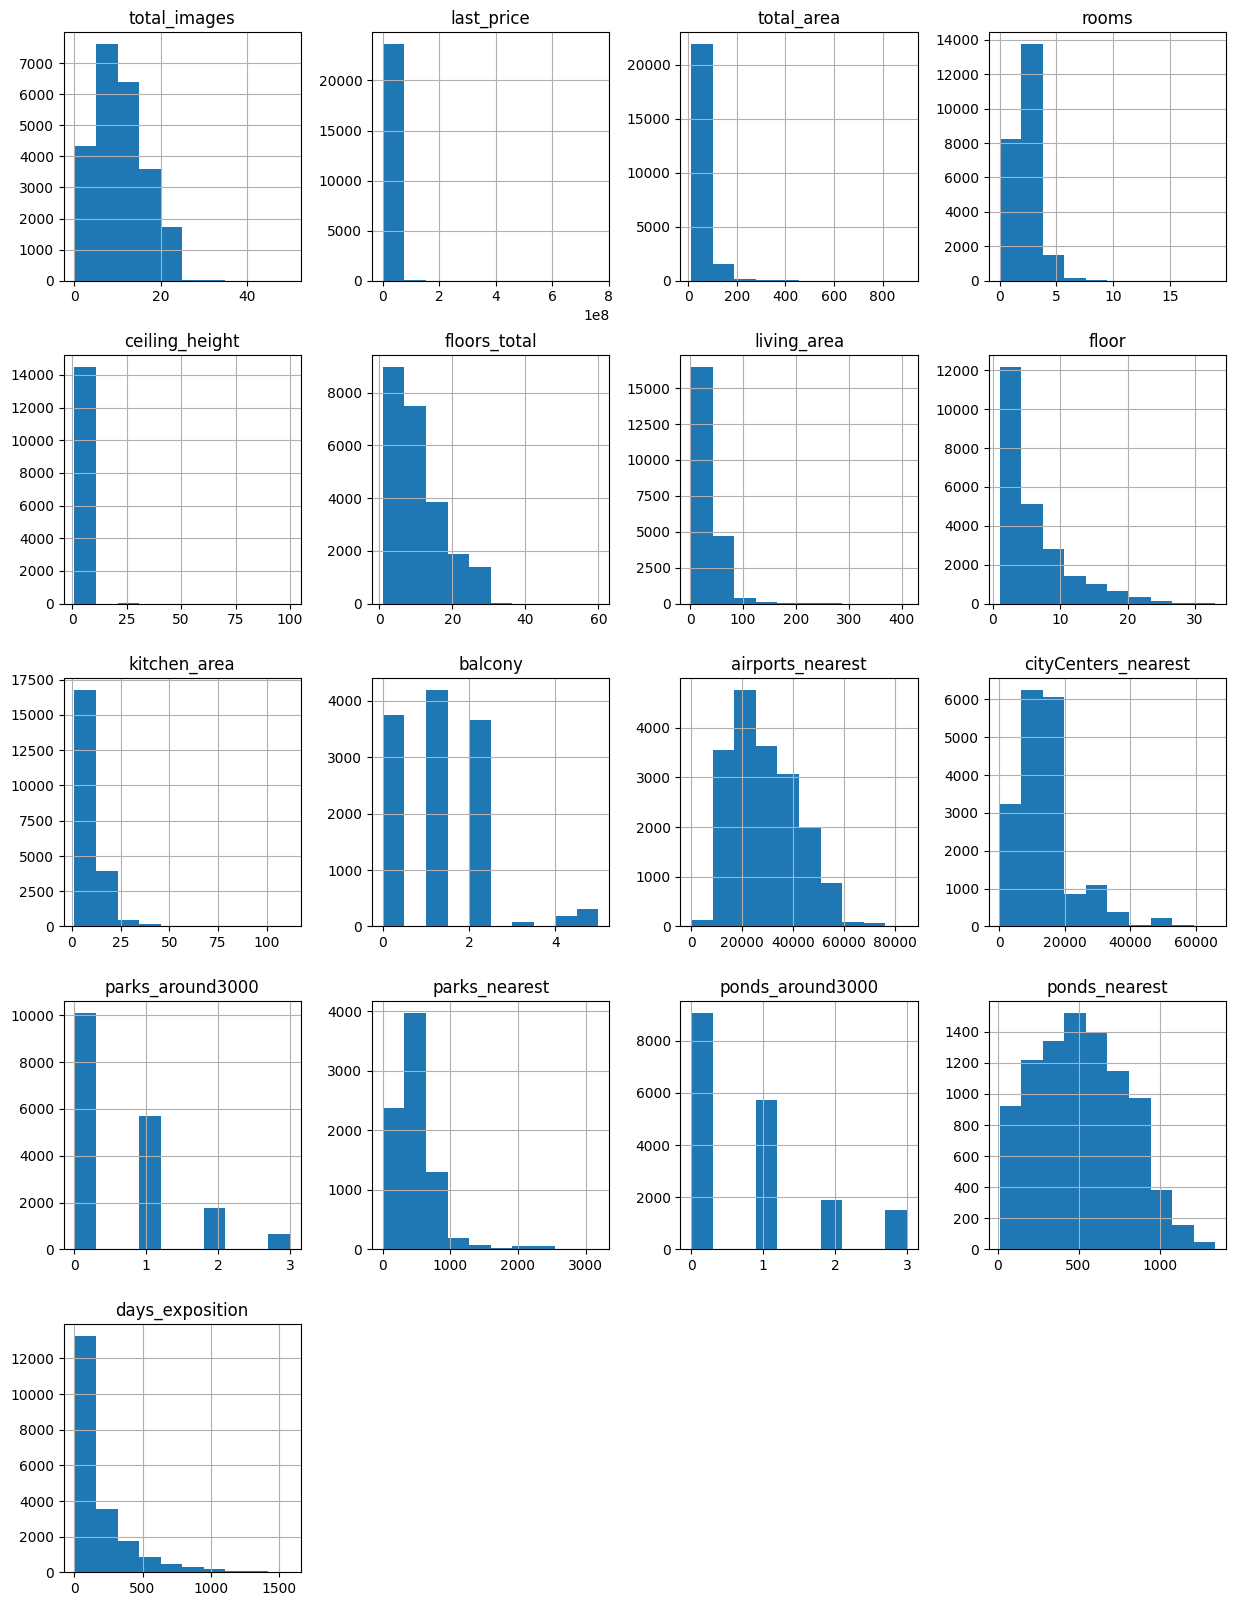

In [4]:
#визуализация
data.hist(figsize=(15, 20))
plt.show();

In [5]:
#переименование столбца 'cityCenters_nearest' в "змеиный регистр"
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


**Выводы:**

Изучение общей информации "обнажило" следующие вопросы для дальнейшего анализа:
 - Из 22 столбцов запонены полностью 8, остальные имеют пустые значения в данных.
 - Гистограмма 'last_price'имееет странные значения, требуется дополнительное изучение графика.
 - Вид гистограмм 'ceiling_height','kitchen_area','living_area', представлен одним столбиком, что может говорить о выбросах в данных.



### Предобработка данных

In [6]:
#Количество пропущенных значений
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Просмотр по отдельности данные каждого столбца, имеющего пустые сроки, с заполнением строк, где это возможно осуществить:**

In [8]:
#data['ceiling_height'].value_counts()
print(data['ceiling_height']. describe())
#max значение 100м, хотя основная часть данных варьируется на значениях до 3 м(что логично).
# просмотр 20 максимальных значений
print(data['ceiling_height'].sort_values(ascending = False).head(20))

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
Name: ceiling_height, dtype: float64


При выводе максимальных значений видно, что ошибка в данных. Нужно переместить "запятую" на одно значение влево(т.е. 25 метров изменить в 2,5 м)

In [9]:
# замена значений больше 20м., на эти же данные деленные на 10
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<20,data['ceiling_height']/10)
#проверка замены(вывод 20 максимальных значений по столбцу)
print(data['ceiling_height'].sort_values(ascending = False).head(20))

15061    14.00
22309    10.30
22869    10.00
5863      8.30
3474      8.00
17442     8.00
15743     8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
Name: ceiling_height, dtype: float64


In [10]:
#замена пустых значений на медианные по столбцу
print(data['ceiling_height'].isna().sum())
data['ceiling_height'] = data['ceiling_height'].fillna(value = data['ceiling_height'].median()) 
print(data['ceiling_height'].isna().sum())


9195
0


In [11]:
# удаление аномальных значений(сложно представить квартиру с высотой потолков более 6 метров и менее 2метров)
data = data[(data['ceiling_height'] < 6) & (data['ceiling_height'] > 2)]

print(data['ceiling_height'].sort_values(ascending = False).unique())

[5.8  5.6  5.5  5.3  5.2  5.   4.9  4.8  4.7  4.65 4.5  4.45 4.4  4.37
 4.3  4.25 4.2  4.19 4.15 4.14 4.1  4.06 4.   3.98 3.95 3.93 3.9  3.88
 3.87 3.86 3.85 3.84 3.83 3.82 3.8  3.78 3.76 3.75 3.7  3.69 3.68 3.67
 3.66 3.65 3.63 3.62 3.6  3.59 3.58 3.57 3.56 3.55 3.54 3.53 3.52 3.51
 3.5  3.49 3.48 3.47 3.46 3.45 3.44 3.43 3.42 3.4  3.39 3.38 3.37 3.36
 3.35 3.34 3.33 3.32 3.31 3.3  3.29 3.28 3.27 3.26 3.25 3.24 3.23 3.22
 3.21 3.2  3.18 3.17 3.16 3.15 3.14 3.13 3.12 3.11 3.1  3.09 3.08 3.07
 3.06 3.05 3.04 3.03 3.02 3.01 3.   2.99 2.98 2.97 2.96 2.95 2.94 2.93
 2.92 2.91 2.9  2.89 2.88 2.87 2.86 2.85 2.84 2.83 2.82 2.81 2.8  2.79
 2.78 2.77 2.76 2.75 2.74 2.73 2.72 2.71 2.7  2.69 2.68 2.67 2.66 2.65
 2.64 2.63 2.62 2.61 2.6  2.59 2.58 2.57 2.56 2.55 2.54 2.53 2.52 2.51
 2.5  2.49 2.48 2.47 2.46 2.45 2.4  2.34 2.3  2.26 2.25 2.2 ]


In [12]:
# изучение данных столбца 'floors_total'
data['floors_total'].value_counts()
display(data.query('floors_total.isna()').head(20))
#  данные все разнородные, общие закономерности не наблюдаются. Все квартиры находятся на разных этажах. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


In [13]:
# Строки с пропусками удалим, чтобы минимизировать искажение общей информации
data = data.dropna(subset=['floors_total'])
display(data.query('floors_total.isna()').head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [14]:
#изменение типа данных 'floors_total' на int,для удобства восприятия(дробного числа в значении общего количества этаже не может быть)
data['floors_total'] = data['floors_total'].astype('int')

In [15]:
#просмотр строк с пустыми значениями в столбце 'balcony'
print(data['balcony'].unique())
#display(data.query('balcony.isna()').head(10))

[nan  2.  0.  1.  5.  4.  3.]


Отсутствие значений в столбце 'balcony', скорее всего говорит, что продавец не заполнил данные из-за отсутвия балкона в квартире.  Такие пропуски правильно заменить на 0.

In [16]:
# замена на О пустыe значения в строке 'balcony' 
# и замена типа данных на int (дробных значений в данном случае не может быть)
data['balcony'] = data['balcony'].fillna(0).astype('int')
#  проверка исправлений
print(data['balcony']. unique())


[0 2 1 5 4 3]


In [17]:
# замена пустых значений в столбцах 'living_area', 'kitchen_area' на средние значения по отношению к total_area
living_avg = data['living_area'].mean() / data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(value=living_avg * data['total_area'])
kitchen_avg = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(value=kitchen_avg * data['total_area'])

In [18]:
display(data.query('kitchen_area.isna()').head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [19]:
#просмотр данных в 'locality_name'
display(data.query('locality_name.isna()').head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5,50.80000,2,NaN,...,8.800000,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4,42.60000,2,NaN,...,18.600000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24,15.60000,3,NaN,...,10.700000,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24,33.10000,21,NaN,...,8.200000,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5,30.80000,5,NaN,...,6.500000,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8,39.62000,7,NaN,...,13.380000,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4,52.30000,3,False,...,10.400000,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.65,7,47.40151,6,NaN,...,14.531662,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.65,7,59.10000,5,False,...,8.300000,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.65,24,20.00000,23,NaN,...,5.252408,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [20]:
# удаление  строк с пустыми значениями в столбце 'locality_name'
data = data.dropna(subset=['locality_name'])
display(data.query('locality_name.isna()').head(10))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [21]:
#просмотр данных в 'locality_name'
print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [22]:
#замена Ё на Е, и приведение к нижнему регистру в новом столбце
data['locality_name_new'] = data['locality_name'].str.replace('ё', 'е').str.lower()
# замена всех видов поселков на просто  'поселок'
data['locality_name_new'] = data['locality_name_new'].str.replace('поселок городского типа','поселок')
data['locality_name_new'] = data['locality_name_new'].str.replace('городской поселок','поселок')
print(data['locality_name_new'].sort_values().unique())

['бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'деревня агалатово' 'деревня аро' 'деревня батово'
 'деревня бегуницы' 'деревня белогорка' 'деревня большая вруда'
 'деревня большая пустомержа' 'деревня большие колпаны'
 'деревня большое рейзино' 'деревня большой сабск' 'деревня бор'
 'деревня борисова грива' 'деревня ваганово' 'деревня вартемяги'
 'деревня вахнова кара' 'деревня выскатка' 'деревня гарболово'
 'деревня глинка' 'деревня горбунки' 'деревня гостилицы'
 'деревня заклинье' 'деревня заневка' 'деревня зимитицы' 'деревня извара'
 'деревня иссад' 'деревня калитино' 'деревня кальтино' 'деревня камышовка'
 'деревня каськово' 'деревня келози' 'деревня кипень' 'деревня кисельня'
 'деревня колтуши' 'деревня коркино' 'деревня котлы' 'деревня кривко'
 'деревня кудрово' 'деревня кузьмолово' 'деревня курковицы'
 'деревня куровицы' 'деревня куттузи' 'деревня лаврики' 'деревня лаголово'
 'деревня лампово' 'деревня лесколово' 'деревня лопухинка'
 'деревня луппо

Значения в столбце 'first_day_exposition'   содержат тип данных object, необходимо заменить на datetime, для возможности в дальнейшем проводить действия с данными, и для удобства визуального просмотра

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [24]:
print(data['is_apartment'].unique())

[nan False True]


In [25]:
display(data.query('is_apartment == False').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
11,9,3300000.0,44.0,2018-08-27,2,2.65,5,31.0,4,False,...,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,ломоносов
25,3,6800000.0,76.0,2015-10-01,2,2.75,23,39.0,18,False,...,2,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0,санкт-петербург
29,9,8600000.0,100.0,2016-04-09,3,2.65,19,52.0,15,False,...,0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0,санкт-петербург
36,13,3790000.0,45.0,2017-01-25,2,2.65,9,27.0,9,False,...,2,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0,санкт-петербург
41,16,7900000.0,74.0,2016-05-04,3,2.65,14,59.0,8,False,...,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0,санкт-петербург


In [26]:
#  заполненных значений мало в таблице, предположительно заполнять эту графу стали недавно.
# заполнени всех пустых значений False
data['is_apartment'] = data['is_apartment'].fillna(value=False)
print(data['is_apartment'].unique().astype('bool'))

[False  True]


In [27]:
#отсутствующие данные в столбцах 'parks_around3000','ponds_around3000' указывают на отсутвие рядом парков и прудов.
#замена пустых значений на 0 и преобразование типа данных на int
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
print(data['parks_around3000'].unique())
print(data['ponds_around3000'].unique())

[1 0 2 3]
[2 0 3 1]


In [28]:
print(data['days_exposition'].value_counts())
print(data['days_exposition']. describe())
#  данные очень разнородные,пропуски могут говорит как о продажи в течении дня размещения, так и том, что квартира еще не продана.
# Заменим пустые значения на 0, для удобства дальнейшего анализа данных, и изменим тип данных на int
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

45.0      878
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
969.0       1
1147.0      1
1.0         1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64
count    20375.000000
mean       180.762847
std        219.788090
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


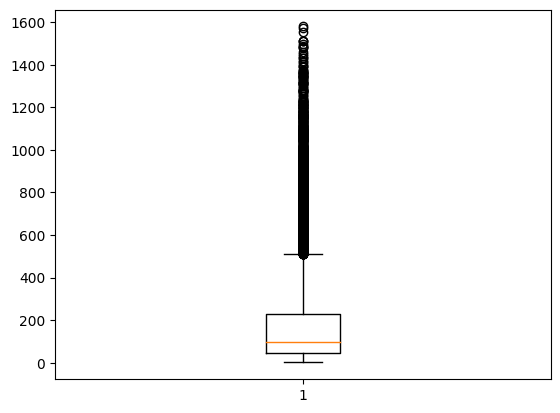

In [29]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition']);

In [30]:
#проверка
data.info()
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23542 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23542 non-null  int64         
 1   last_price            23542 non-null  float64       
 2   total_area            23542 non-null  float64       
 3   first_day_exposition  23542 non-null  datetime64[ns]
 4   rooms                 23542 non-null  int64         
 5   ceiling_height        23542 non-null  float64       
 6   floors_total          23542 non-null  int64         
 7   living_area           23542 non-null  float64       
 8   floor                 23542 non-null  int64         
 9   is_apartment          23542 non-null  bool          
 10  studio                23542 non-null  bool          
 11  open_plan             23542 non-null  bool          
 12  kitchen_area          23542 non-null  float64       
 13  balcony         

In [31]:
# изменение типа данных last_price, удаление данных после запятой
data['last_price'] = data['last_price'].astype('int')
print(data['last_price'].head())

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int64


In [32]:
#проверка на янвые дубликаты
print(data.duplicated().sum())

0


**Выводы**

На этапе предобработки данных были внесены следующие корректировки в общую таблицу: 
 - first_day_exposition -  изменен тип данных на datetime( в изначальной версии object)
 - ceiling_height - исправлены некорректные данные( 2,5м, вместо 25м), замена пустых значений на медианые, удалены аномальные данные(потолки выше 6м, и ниже 2м)
 - floors_total - изменен тип данных на int( в изначальной версии float), удалены пустые значения
 - is_apartment - пустые значения изменены на False, тип данных изменен на bool
 - living_area - замена пустых значений на среднеарифметическое по отношению к total_area
 - kitchen_area - замена пустых значений на среднеарифметическое по отношению к total_area
 - balcony - изменен тип данных на int( в изначальной версии float), пустые значения изменены на 0
 - locality_name - удалены пустые значения, скорректированы названия(приведены к нижнему регистру, удалены неявные дубликаты)
 - airports_nearest - без изменений
 - cityCenters_nearest - без изменений
 - parks_around3000 - тип данных изменен на int(в изначальной версии float),  замена пустых значений на 0
 - parks_nearest - без изменений
 - ponds_around3000 - тип данных изменен на int(в изначальной версии float),  замена пустых значений на 0
 - ponds_nearest - без изменений
 - days_exposition - тип данных изменен на int, пустые значения на 0.

### Добавление в таблицу новые столбцы

 - цена одного квадратного метра;
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
 - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [33]:
#Расчет цена одного квадратного метра
data['price_m2'] = (data['last_price'] / data['total_area']).round(2)
print(data['price_m2'].head())

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_m2, dtype: float64


In [34]:
#добавление столбца с днями недели публикации объявления (0 — понедельник, 1 — вторник и так далее), месяц публикации объявления;
# и года публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_m2,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482.0,2,755.0,0,санкт-петербург,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,NaN,0,NaN,81,поселок шушары,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,1,90.0,2,574.0,558,санкт-петербург,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.805303,9,False,...,2,84.0,3,234.0,424,санкт-петербург,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112.0,1,48.0,121,санкт-петербург,100000.00,1,6,2018


In [35]:
data['first_day_exposition'].dt.date 
#приводим к временному формату
data['first_day_exposition'].astype('datetime64[M]') 
print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23542, dtype: datetime64[ns]


In [37]:
# добавление столбца с типом этажа квартиры (значения — «первый», «последний», «другой»)
def floor_gr(row):
    if  row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row ['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_gr, axis=1)

print(data[['floors_total','floor','floor_type']].head(10))
display(data.query('floor == floors_total').head())

   floors_total  floor floor_type
0            16      8     другой
1            11      1     первый
2             5      4     другой
3            14      9     другой
4            14     13     другой
5            12      5     другой
6            26      6     другой
7            24     22     другой
8            27     26     другой
9             9      7     другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_m2,weekday,month,year,floor_type
12,10,3890000,54.0,2016-06-30,2,2.65,5,30.0,5,False,...,NaN,0,NaN,90,сертолово,72037.04,3,6,2016,последний
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,294.0,3,298.0,366,петергоф,82943.93,5,7,2017,последний
23,11,2950000,32.0,2016-10-29,1,2.60,9,17.7,9,False,...,517.0,1,190.0,615,санкт-петербург,92187.50,5,10,2016,последний
36,13,3790000,45.0,2017-01-25,2,2.65,9,27.0,9,False,...,459.0,0,NaN,139,санкт-петербург,84222.22,2,1,2017,последний
43,13,9330000,48.0,2017-01-10,2,3.00,4,28.0,4,False,...,NaN,1,492.0,763,санкт-петербург,194375.00,1,1,2017,последний


In [38]:
#добавление расстояния до центра города в километрах (переведите из м в км и округлите до целых значений)
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()
print(data[['city_centers_nearest', 'city_centers_nearest_km']].head())

   city_centers_nearest  city_centers_nearest_km
0               16028.0                     16.0
1               18603.0                     19.0
2               13933.0                     14.0
3                6800.0                      7.0
4                8098.0                      8.0


### Исследовательский анализ данных

**Изучим следующие параметры: площадь, цена объекта, количество комнат, высота потолков,этаж квартиры,расстояния, и даты публикации. Постройте гистограммы для каждого параметра.**

<AxesSubplot:title={'center':'kitchen_area'}, ylabel='Frequency'>

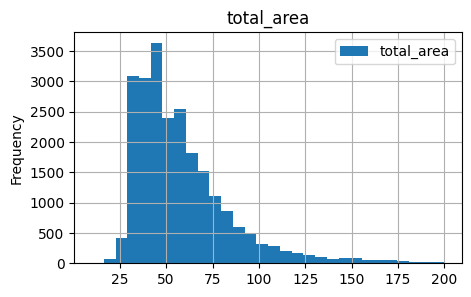

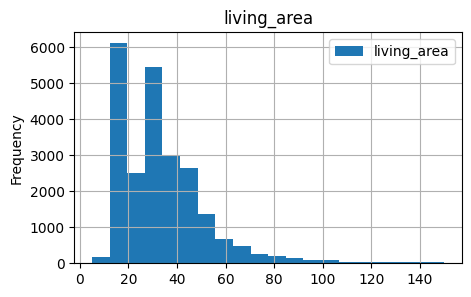

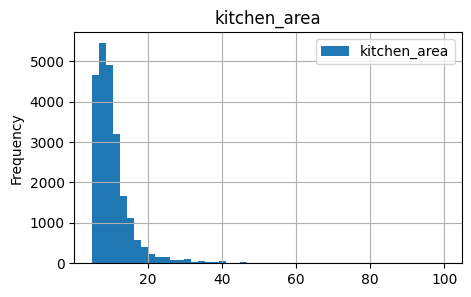

In [39]:
# изучение общей площади
data.plot(kind ='hist', y='total_area', range =(10,200), bins=30,  title='total_area', grid = True,figsize = (5,3))
#изучение жилой площади
data.plot(kind ='hist', y='living_area', range =(5,150), bins=20,  title='living_area', grid = True, figsize = (5,3))
#изучение площади кухни
data.plot(kind ='hist', y='kitchen_area', range =(5,100), bins=50,  title='kitchen_area', grid = True, figsize = (5,3))

In [40]:
# обзор общей информации по столбцу 'total_area', 10 мах значений и 5 min
print(data['total_area'].sort_values(ascending = False).head(10))
print(data['total_area'].sort_values().head())
data['total_area'].describe()

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64
19904    12.0
17961    13.0
19546    13.0
19807    13.0
19558    13.2
Name: total_area, dtype: float64


count    23542.000000
mean        60.328575
std         35.659110
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [41]:
# обзор общей информации по столбцу 'living_area', 10 мах значений и 5 min
print(data['living_area'].sort_values(ascending = False).head(10))
print(data['living_area'].sort_values().head())
data['living_area'].describe()

19540    409.700000
5358     409.000000
3117     360.365697
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
15016    285.551266
Name: living_area, dtype: float64
13915    2.0
21758    2.0
3242     3.0
23574    3.0
17582    5.0
Name: living_area, dtype: float64


count    23542.000000
mean        34.594268
std         22.367201
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [42]:
# обзор общей информации по столбцу 'kitchen_area', 10 мах значений и 5 min
print(data['kitchen_area'].sort_values(ascending = False).head(10))
print(data['kitchen_area'].sort_values().head())
data['kitchen_area'].describe()

19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.540135
10867     87.200000
9826      86.507161
492       77.000000
Name: kitchen_area, dtype: float64
20217    1.3
16367    2.0
906      2.0
11033    2.0
21419    2.0
Name: kitchen_area, dtype: float64


count    23542.000000
mean        10.501581
std          6.039992
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**Выводы:**
При всем разнообразии предложений, в основном на рынке недвижимости Спб и Лен. области преобладают квартиры с общей площадью от 30 до 50м2, жилой площадью от 15 до 40м2 и размером кухни от 6 до 12м2, на них приходится "львиная доля" всех предложений. Есть и предложения, подкупающие своей просторностью: 10 квартир с максимальными размерами общей площади - от 500 до 900 м2, жилой площадью от 270 до 400м2 и кухней от 75 до 100м2. "Компактные" варианты квартир имеют следующие размеры: общая площадь от 10 до 20м2, жилая площадь до 10м2, и кухня до 6м2.

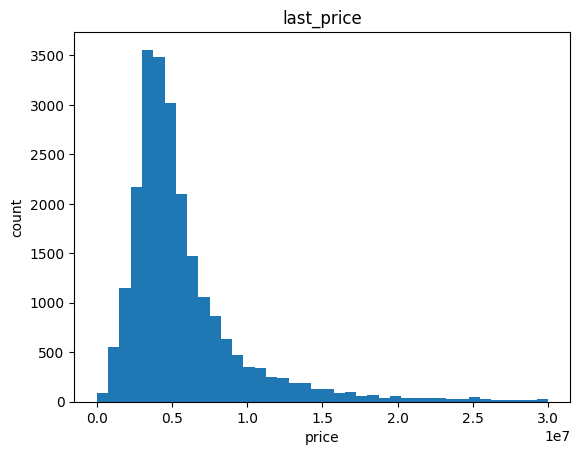

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64
8793      12190
14911    430000
17456    430000
16274    440000
9581     450000
Name: last_price, dtype: int64


count    2.354200e+04
mean     6.537198e+06
std      1.089096e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.648500e+06
75%      6.796750e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [43]:
# изучение цены объекта
import matplotlib.pyplot as plt
plt.hist(data['last_price'], bins=40,range=(0,30000000))
plt.title('last_price')
plt.xlabel('price')
plt.ylabel('count')
plt.show()
#общая информация
print(data['last_price'].sort_values(ascending = False).head(10))
print(data['last_price'].sort_values().head())
data['last_price'].describe()

**Вывод:**
Больше всего предложений варьируется в ценновом диапазоне от 4 до 6 млн, самые бюджетные варианты колеблются в районе 400-450 тыс, самые дорогие - от 230 млн до 763 млн. Предлложения на любой размер кошелька.

14498    19
18848    16
5358     15
866      14
20829    14
Name: rooms, dtype: int64


<AxesSubplot:title={'center':'floor'}, ylabel='Frequency'>

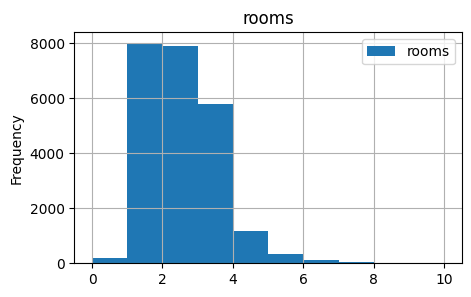

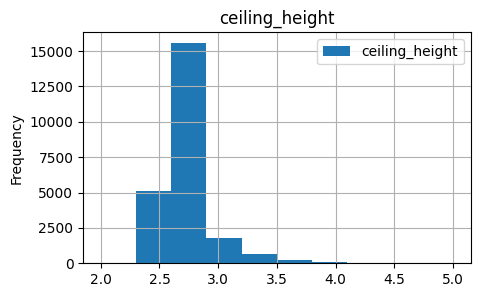

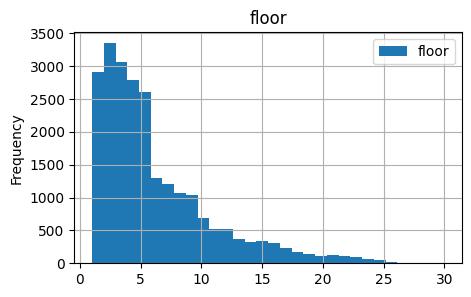

In [44]:
# изучение количество комнат
data.plot(kind ='hist', y='rooms', range =(0,10), bins=10,  title='rooms', grid = True,figsize = (5,3))
#максимальное количество комнат в квартире
print(data['rooms'].sort_values(ascending = False).head())
#высота потолков
data.plot(kind ='hist', y='ceiling_height', range =(2,5), bins=10,  title='ceiling_height', grid = True,figsize = (5,3))
#этаж квартиры
data.plot(kind ='hist', y='floor', range =(1,30), bins=30,  title='floor', grid = True,figsize = (5,3))


2253     60
16731    52
397      36
5807     36
11079    36
8496     35
9186     35
4855     35
18629    35
2966     35
Name: floors_total, dtype: int64


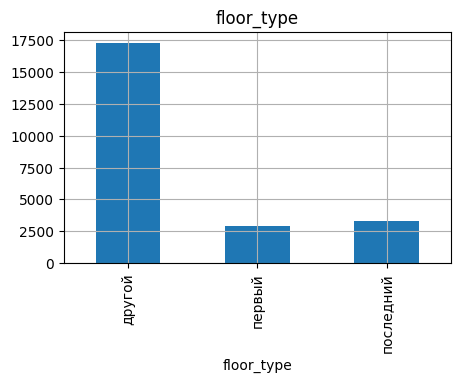

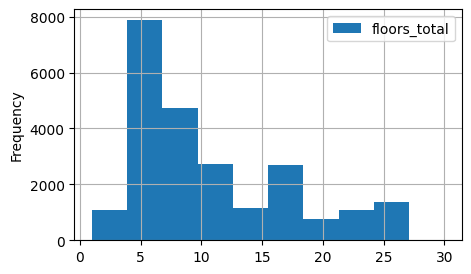

In [45]:
# изучение типа этажа квартиры («первый», «последний», «другой»)
(data.groupby('floor_type')['floor_type'].count()).plot.bar(figsize = (5,3),grid = True,title='floor_type')
#изучение общего количество этажей в доме;
data.plot(kind ='hist', y='floors_total', range =(1,30), bins=10, grid = True,figsize = (5,3))
print(data['floors_total'].sort_values(ascending = False).head(10))

**Вывод:**
Большая часть квартир на продажу располагается в домах с невысокой застройкой (до 5-6 этажей),на втором месте по количеству - дома высотой до 10 этажей. Самые высотные дома - дома с 60 этажами. 
Предложений о приобретении "дома" на последнем этаже превышает предложения на первом, но разрыв незначительный. 
Основная масса предложений - это 2-х, 3-х комнатные квартиры, высота потолков 2,4м - 2,6м, на невысоких этажах (от 2 до 5го этажа). Есть и дома с большим количеством комнат( максимальное значение 19 комнат), но такие предложения единичны.

5491
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: city_centers_nearest, dtype: float64


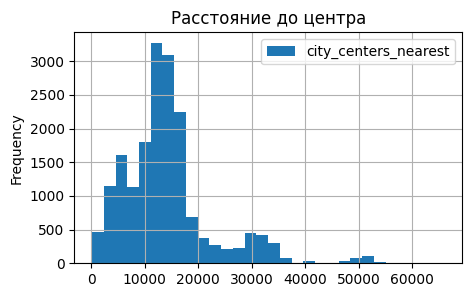

In [46]:
#изучение расстояния до ближайшего до центра города в метрах
data.plot(kind ='hist', y='city_centers_nearest', bins=30, grid = True,title='Расстояние до центра',figsize = (5,3))
print(data['city_centers_nearest'].isna().sum())
print(data['city_centers_nearest'].sort_values(ascending = False).head(10))

5514
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


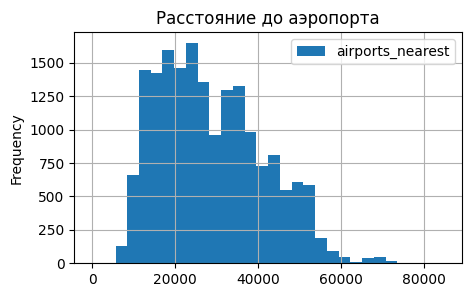

In [47]:
#изучение расстояния до ближайшего аэропорта
data.plot(kind ='hist', y='airports_nearest', bins=30, grid = True,title='Расстояние до аэропорта',figsize = (5,3))
print(data['airports_nearest'].isna().sum())
print(data['airports_nearest'].sort_values(ascending = False).head(10))

15520
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64
14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
Name: parks_nearest, dtype: float64


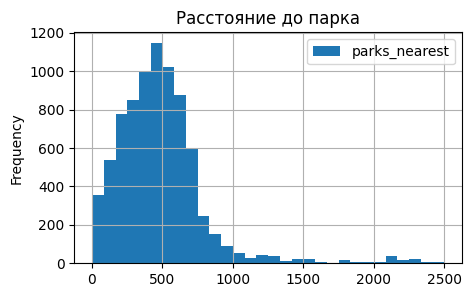

In [48]:
#изучение расстояния до ближайшего парка
data.plot(kind ='hist', y='parks_nearest', bins=30,range =(1,2500), title='Расстояние до парка',grid = True,figsize = (5,3))
print(data['parks_nearest'].isna().sum())
print(data['parks_nearest'].sort_values(ascending = False).head(10))
print(data['parks_nearest'].sort_values().head())

**Выводы:**
Больше всего предложений на рынке с удаленностью от центра на 10-25км, от аэропорта от 10 до 30 км.
Практически половина всех представленных квартир имет рядом парковую зону(в основном расстояние от парка до квартиры составляет от 200м до 700м)

<AxesSubplot:title={'center':' Месяц публикации'}, ylabel='Frequency'>

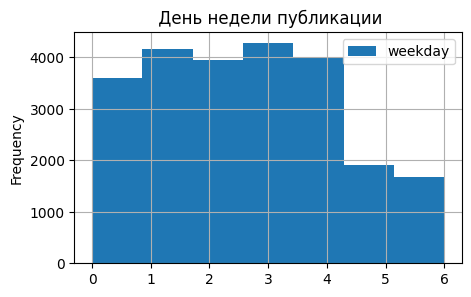

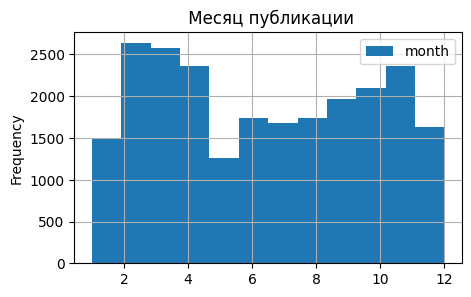

In [49]:
#изучение дня и месяца публикации объявления.
data.plot(kind ='hist', y='weekday', bins=7, grid = True,figsize = (5,3),title=' День недели публикации')
data.plot(kind ='hist', y='month', bins=12, grid = True,figsize = (5,3),title=' Месяц публикации')

**Вывод:**
Наибольшую активность продавцы проявляют в будние дни(вторник и четверг  - наиболее излюбленные дни для размещения объявления о продаже).Самые активные месяца,где количество предложений на рынке возрастает: февраль, март, апрель,ноябрь. Спад предложений наблюдается в январе, мае, декабре (люди не склоны принимать сложные решения в период праздников)

In [50]:
# Изучение срока реализации квартир(столбец days_exposition)
print(data['days_exposition'].sort_values(ascending = False).head(10))
print(data[data['days_exposition']!=0]['days_exposition'].sort_values().head(10))
data[data['days_exposition']!=0]['days_exposition'].describe()

18843    1580
1109     1572
9553     1553
1885     1513
20969    1512
6691     1512
14093    1497
15313    1489
19123    1485
11955    1484
Name: days_exposition, dtype: int64
1632     1
13061    2
16212    2
16053    2
5230     3
20959    3
9778     3
14279    3
16793    3
13389    3
Name: days_exposition, dtype: int64


count    20375.000000
mean       180.762847
std        219.788090
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

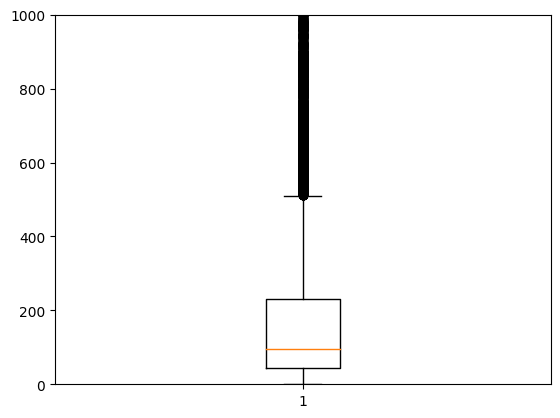

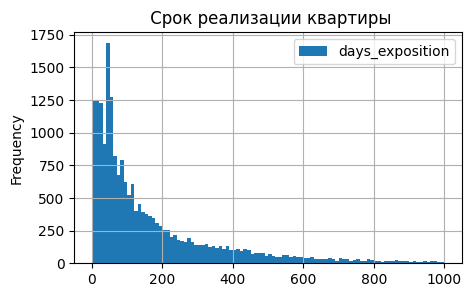

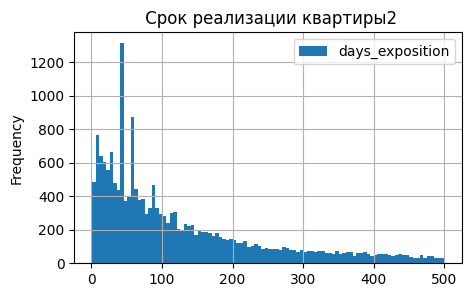

In [53]:
# Диаграмма размаха
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(0,1000)
plt.show();
# гистограмма
data.plot(kind ='hist', 
          y='days_exposition',
          bins=100,
          range= (1,1000),
          grid = True,
          figsize = (5,3),
          title=' Срок реализации квартиры');
#дополнительная гистограмма, но с охватом значений от 0 до 500(все,что свыше, по диаграмме размаха - выбросы)
data.plot(kind ='hist',
          y='days_exposition',
          bins=100,
          range= (1,500),
          grid = True,
          figsize = (5,3),
          title=' Срок реализации квартиры2');

In [54]:
#Просмотр значений, "выбивающихся" из гистограммы
data[(data['days_exposition']!=0) & (data['days_exposition']<100)]['days_exposition'].value_counts()

45    878
60    538
7     234
30    208
90    200
     ... 
78     49
94     49
87     43
2       3
1       1
Name: days_exposition, Length: 99, dtype: int64

**Выводы:**
В основном  квартиры реазлизуются за период  7-60 дней, но есть и продажи, которые можно назвать быстрыми(до 7 дней) и очень долгими(свыше 500 дней).
Медианное значение срока реализации - 85 дней,среднее значение - 180 дней, такой разброс как раз и  свидетельствует, о наличии выбросов(быстрые и очень долгие продажи).
 Интересная ситуация наблюдается на значениях 45 дней, и 60 дней. Требуется уточнение информации, касательно этого периода у сотрудников, собирающих данные, чтобы понять это аномальные данные, или это период, после которого обьявление переходит на "какой то другой уровень".

**Факторы больше всего влияют на общую (полную) стоимость объекта**

            last_price_mln
total_area                
12.0                 2.400
13.0                 2.350
13.2                 1.686
14.0                 1.190
15.0                 1.725
Коэффициент корреляции: 0.653753136426412


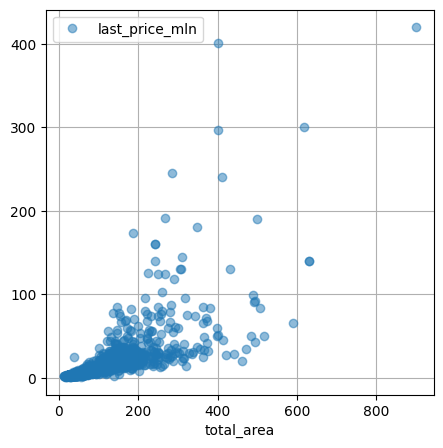

In [55]:
# Анализ влияния общей площади на стоимость квартиры
# преобразование стоимости квартиры (руб в млн.руб) для удобства предствления на графиках
data['last_price_mln'] = (data['last_price']/1000000).round(3)
pivot_table_area = data.pivot_table(index = 'total_area',values = 'last_price_mln')
print(pivot_table_area.head())
pivot_table_area.plot(grid=True, style='o', alpha = 0.5,figsize=(5, 5))
print("Коэффициент корреляции:", data['total_area'].corr(data['last_price_mln']))

             last_price_mln
living_area                
2.0                   4.340
3.0                  34.715
5.0                   2.680
5.4                   6.100
6.0                   3.799
Коэффициент корреляции: 0.5851654327707217


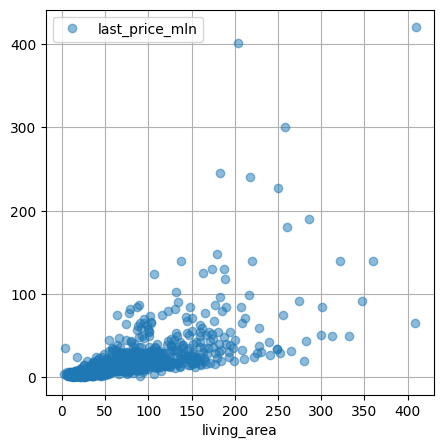

In [56]:
# Анализ влияния жилой площади на стоимость квартиры
pivot_table_living_area = data.pivot_table(index = 'living_area',
                                           values = 'last_price_mln')
print(pivot_table_living_area.head())
pivot_table_living_area.plot(grid=True, style='o', alpha = 0.5,figsize=(5, 5))
print("Коэффициент корреляции:", data['living_area'].corr(data['last_price_mln']))

              last_price_mln
kitchen_area                
1.300000            4.250000
2.000000            2.821429
2.100963            2.400000
2.276044            2.350000
2.300000            2.940000
Коэффициент корреляции: 0.515297056431115


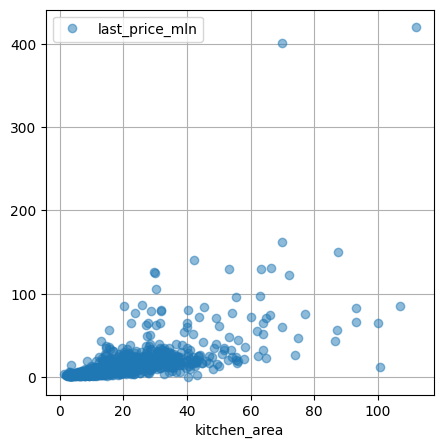

In [57]:
# Анализ влияния площади кухни на стоимость квартиры
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area',values = 'last_price_mln')
print(pivot_table_kitchen_area.head())
pivot_table_kitchen_area.plot(grid=True, style='o', alpha = 0.5,figsize=(5, 5))
print("Коэффициент корреляции:", data['kitchen_area'].corr(data['last_price_mln']))

**Вывод:**
Коофициент корреляции общей площади и цены составляет 0.6, что подтверждает, что существует связь между ценой и площадью, и при увеличении площади жилья, стоимость квартиры также изменяется в большую сторону. Расчет коээфициента корреляции жилой площади ниже и составляет 0.58, корреляции кухни и цены 0.51

       last_price_mln
rooms                
0            3.344490
1            3.833313
2            5.588660
3            8.176700
4           13.327753
5           23.798305
6           31.880038
7           51.470068
8           50.224167
9           34.152375
10          26.166667
11          25.250000
12         420.000000
14          26.829500
15          65.000000
16          28.500000
19          32.250000
Коэффициент корреляции: 0.36329508321391774


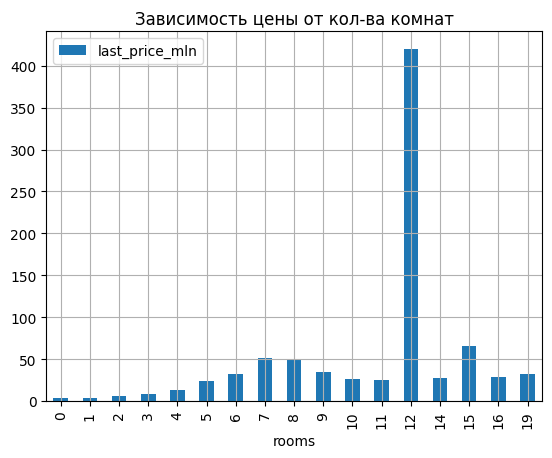

In [58]:
# Анализ влияния количества комнат на стоимость квартиры
pivot_table_rooms = data.pivot_table(index = 'rooms',values = 'last_price_mln')
print(pivot_table_rooms)
pivot_table_rooms.plot.bar(title = 'Зависимость цены от кол-ва комнат', grid=True)
print("Коэффициент корреляции:", data['rooms'].corr(data['last_price_mln']))

            last_price_mln
floor_type                
другой                4.85
первый                3.90
последний             4.30
                last_price_mln
last_price_mln             1.0


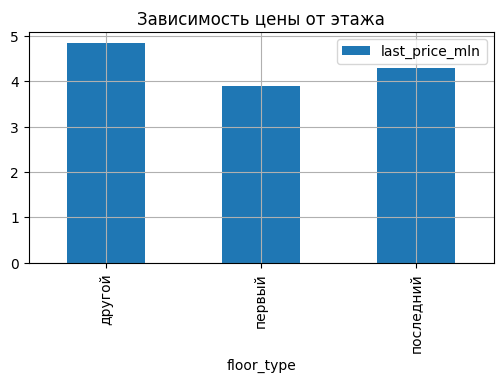

In [59]:
# Анализ влияния этажа, на котором расположена квартира (первый, последний, другой)
pivot_table_floor_type = data.pivot_table(index = 'floor_type',values = 'last_price_mln', aggfunc = 'median')
print(pivot_table_floor_type.head())
pivot_table_floor_type.plot.bar(title = 'Зависимость цены от этажа',figsize=(6, 3),grid=True)
#print("Коэффициент корреляции:", data['floor_type'].corr(data['last_price_mln']))
print(pivot_table_floor_type.corr())

**Вывод:** Коэффициент корреляции количества комнат и стоимости жилья составляет 0.3, что говорит о слабой связи, т.е. не всегда увеличение количест комнат приводит к увеличению стоимости.Исходя из анализа, можно отметить, что средняя цена на квартиры до 3 комнат в среднем до 10 млн. Средняя стоимость последнего этажа на 11% превышает стоимость первого. Первый этаж является наиболее выгодным предложением. Другие этажи по стоимости выше первого и последнего.

         last_price_mln
weekday                
0              6.489648
1              6.389726
2              6.629832
3              6.710402
4              6.361343
5              6.987043
6              6.248699
Коэффициент корреляции: 0.0020629043533023548


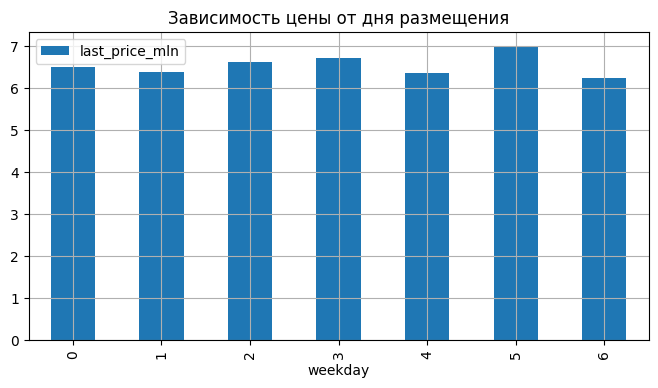

In [60]:
# Анализ влияния даты размещения (день недели, месяц, год) на стоимость
pivot_table_weekday = data.pivot_table(index = 'weekday',values = 'last_price_mln')
print(pivot_table_weekday.sort_values(by ='weekday'))
pivot_table_weekday.plot.bar(title = 'Зависимость цены от дня размещения',figsize=(8, 4),grid=True)
print("Коэффициент корреляции:", data['weekday'].corr(data['last_price_mln']))

       last_price_mln
month                
1            6.664171
2            6.465279
3            6.360847
4            6.743397
5            6.595838
6            6.319195
7            6.572448
8            6.348976
9            6.839227
10           6.242028
11           6.449442
12           7.011144
Коэффициент корреляции: 0.0027392334279200854


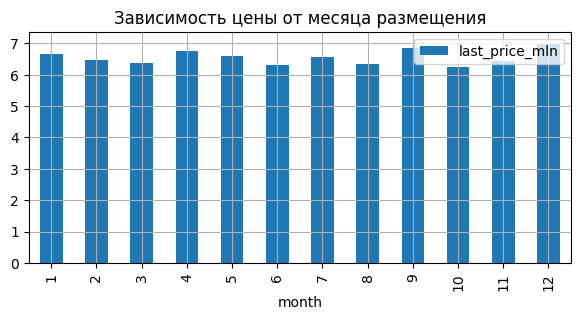

In [61]:
# Анализ влияния даты размещения (месяц) на стоимость
pivot_table_month = data.pivot_table(index = 'month',values = 'last_price_mln')
print(pivot_table_month.sort_values(by ='month'))
pivot_table_month.plot.bar(title = 'Зависимость цены от месяца размещения',figsize=(7, 3),grid=True )
print("Коэффициент корреляции:", data['month'].corr(data['last_price_mln']))

      last_price_mln
year                
2014       12.046603
2015        8.598454
2016        6.829565
2017        6.571217
2018        5.956655
2019        6.777428
Коэффициент корреляции: -0.04283358755010105


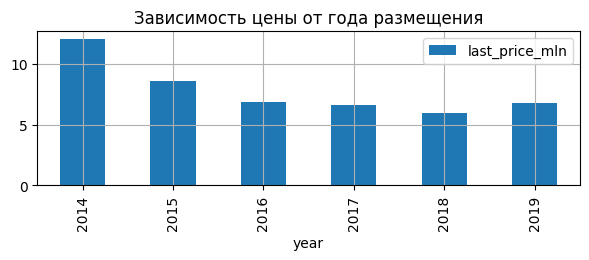

In [62]:
# Анализ влияния даты размещения (год) на стоимость
pivot_table_year = data.pivot_table(index = 'year',values = 'last_price_mln')
print(pivot_table_year.sort_values(by ='year'))
pivot_table_year.plot.bar(title = 'Зависимость цены от года размещения',figsize=(7, 2),grid=True )
print("Коэффициент корреляции:", data['year'].corr(data['last_price_mln']))

**Вывод:**
 Влияния даты размещения обьявления практически не влияет на стоимость жилья, анализ лишь нам показывает как менялась цена в определенные периоды времени.
 Можно отметить, что наблюдается  снижение средней стоимости жилья с 2014 года по 2018, и лишь в 2019 году снова наблюдается прирост средней стоимости.
 Из месяца в месяц стоимость не сильно расходится, лишь в декабре наблюдается прирост на 7-8%, что можно связать с праздничным ажиотажем и повсеместным увеличением цен на все.

**4.Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.** 

In [63]:
#добавление в таблицу data столбца со сред.ценой за м2
data['avg_price_m2'] =(data['last_price']/data['total_area']).round(2)
# расчет количества обьявлений и средней цены за м2
locality_pivot_table = data.pivot_table(index = 'locality_name_new', values = 'avg_price_m2', aggfunc=['count', 'median'])
locality_pivot_table.columns = ['count','median']
print(locality_pivot_table.sort_values(by='count',ascending = False).head(10))


                   count      median
locality_name_new                   
санкт-петербург    15640  104772.405
поселок мурино       552   86059.295
поселок шушары       439   76829.270
всеволожск           397   65789.470
пушкин               369  100000.000
колпино              338   74723.745
поселок парголово    327   91642.860
гатчина              307   67796.610
деревня кудрово      299   91860.470
выборг               235   58307.690


**Вывод:**
При рассмотрении 10 населенных пунктов с наибольшим количеством обьявлений, вывлено, что самая высокая стоимость 1 кв.м. в Санкт-Петербурге (104 761 за м2), самая низкая. в Выборге(58 158 за м2).

**5.Анализ стоимости квартиры с учетом удаленности от центра города**

                          avg_price_m2   price_km
city_centers_nearest_km                          
0.0                      245833.530370        inf
1.0                      177005.407604  177005.41
2.0                      157849.007290   78924.50
3.0                      121507.831638   40502.61
4.0                      133282.874738   33320.72
5.0                      140453.957005   28090.79
6.0                      150228.861151   25038.14
7.0                      156176.879524   22310.98
8.0                      124825.411554   15603.18
9.0                      113159.373333   12573.26
10.0                     112607.481421   11260.75
11.0                     108388.277329    9853.48
12.0                     107481.063358    8956.76
13.0                     108099.098036    8315.32
14.0                     104201.232700    7442.95
15.0                     104251.125051    6950.08
16.0                     100542.613929    6283.91
17.0                      96970.230944    5704.13


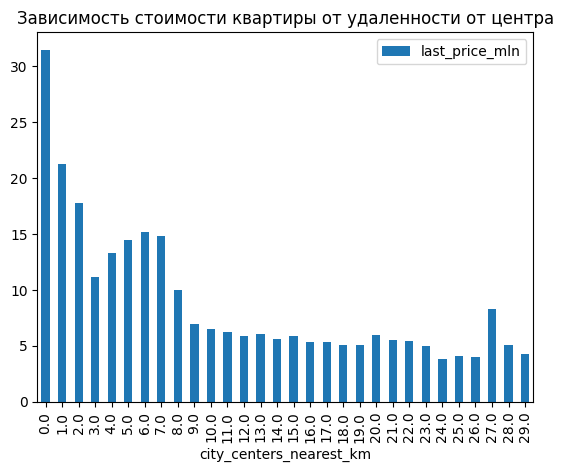

In [66]:
#расчет цены км(по отношению к средней цене за 1 м2) в зависимости от удаленности от центра города Спб
city_centers_km_price = data[data['locality_name_new']=='санкт-петербург'] \
.pivot_table(index='city_centers_nearest_km',values ='avg_price_m2', aggfunc = 'mean')
city_centers_km_price['price_km'] = (city_centers_km_price['avg_price_m2']/city_centers_km_price.index).round(2)
print(city_centers_km_price)
#построение графика зависимости стоимости и удаленности от центра
data[data['locality_name_new']=='санкт-петербург'] \
.pivot_table(index='city_centers_nearest_km',values ='last_price_mln', aggfunc = 'mean')\
    .plot(kind='bar', title = 'Зависимость стоимости квартиры от удаленности от центра');

**Вывод:**
Чем ближе к центру, тем дороже квартира. На расстоянии до 10 км до центра города стоимость кв.м квартиры от 10тыс,в радиусе 3 км - стоимость от 40 тыс.

### Общий вывод

**В ходе анализа были совершены следующие действия над данными:**
   - скоректированы типы данных (`first_day_exposition`,`floors_total`,`is_apartment`,`balcony`,`parks_around3000`,`ponds_around3000`);
   - заполнены пустые данные медианными значениям(`ceiling_height`), среднеарифметиескими(`living_area`,`kitchen_area`)и замена на 0 (`balcony`, `parks_nearest`,`ponds_nearest`);
   - удалены неявные дубликаты(`locality_name`);
   - добавлены столбцы с информацией  о дате размещения обьявления(день недели, месяц, год), цена за 1кв.м., расположение квартиры(первый этаж, последний, другой)
    
 **Все эти действия позволили сделать наиболее точный анализ и сформировать следующие выводы:**
 - большая часть предложений с  общей площадью от 30 до 50 кв.м.,жилой площадью от 15 до 40 кв.м., площадь кухни от 6 до 12 кв.м.  
 - цена большинства предложений в диапазоне от 4 до 6 млн, бюджетные варианты в пределах 450 тыс, самые дорогие от 230млн, но они малочислены
 - Квартиры в основном  2-х, 3-х комнатные с высотой потолка 2.4-2.6м. МАксимальное количество комнат 19
 - удаленность от центра города 20-25 км, от аэропорта 10-30км
 - практически половина предложений поблизости с парковой зоной ( 200-700м удаления)
 - больше всего размещений обьявлений приходится на вторник и четверг. Наиболее активные месяца: февраль, март, апрель, ноябь. Спад предложений: май, декабрь
 - В основном срок реализации квартиры составляет от 7 до 60 дней. Но есть и быстрые продажи - до 7 дней, очень долгие - от 500дней
    
  **Факторы, влияющие на стоимость квартир**
  - Цена прежде всего зависит от общей площади (коэф.корр. 0,6), в меньшей степень от жилой площади(коэф.корр. 0,58) и от кухни(коэф.корр. 0,51)
  -  зависимость от количества комнат незначительная (коэф.корр. 0,3). Но можно отметить, что средняя цена на 1комнатные квартиры до 3,8млн, 2х-комнатные - 5,5млн, 3х-комнатные - 8,1 млн, квартиры с большим количеством комнат  стартуют от 10 млн
  - Квартиры на последнем этаже оцениваются выше, чем квартиры на первом и на прочих. Самая низкая цена на первых этажах 
  - Зависимость от даты публикации практически не наблюдается, можно лишь отметить, что объявления, выставленные в декабре выше на 5-7%
  - топ 10 населеных пунктов с самым большим количеством предложений возглавляет Санкт-Петербруг, где средняя цена 1 кв.м составляет 104 тыс, и замыкает Выборг со средней ценой 58тыс за кв.м 
  
  **Рекомендации**
  - в дальнейшем добавить сегментацию квартир на момент заполнения объявления( эконом, комфорт, премиум), что позволит улучшить аналитику
  -  в обьявлении установить обязательный параметр для заполнения таких граф, как жилая площадь, площадь кухни
  